# Задача 1

In [1]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *
import pandas as pd
from numpy import linalg
from numpy.random import shuffle

In [2]:
data = pd.read_csv('forestfires.csv').drop('day',1)

summer_set = ['jun','jul','aug']
data['month'] = [int(i in summer_set) for i in data['month']]
data['free_term'] = 1
data.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,free_term
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,7,4,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [3]:
x_headers = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI', 
             'temp', 'RH', 'wind', 'rain', 'free_term']
y_headers = ['area']

In [4]:
def Fit(data):
    X = data[x_headers]
    Y = data[y_headers]
    first = np.dot(X.T, X)
    second = np.dot(linalg.inv(first), X.T)
    return np.dot(second, Y)

def Split(data_old, k):
    # Перемешиваем
    data = data_old.reindex(np.random.permutation(data_old.index))
    assert k < 1, "k must be less than 1.0"
    train = data[:int(floor(k*len(data)))]
    test = data[int(floor(k*len(data))):]
    return train, test

def Predict(data, coefs):
    return np.dot(data, coefs)

def Error(predictions, answers):
    res = 0
    delta = predictions - answers.values
    return (delta.T.dot(delta) / len(predictions))[0][0]

def Train(data, k):
    train, test = Split(data, k)
    predictions = Predict(test[x_headers], Fit(train))
    return Error(predictions, test[y_headers])

In [5]:
print(Train(data, 0.7))

1010.09143105


In [6]:
def LogError(data_old, k, c):
    data = data_old.copy()
    data['area'] = log(data['area'].values + c)
    return Train(data, k)

In [7]:
print(data.head())
LogError(data, 0.7, 10)

   X  Y  month  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  free_term
0  7  5      0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0          1
1  7  4      0  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0          1
2  7  4      0  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0          1
3  8  6      0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0          1
4  8  6      0  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0          1


0.69564970287894767

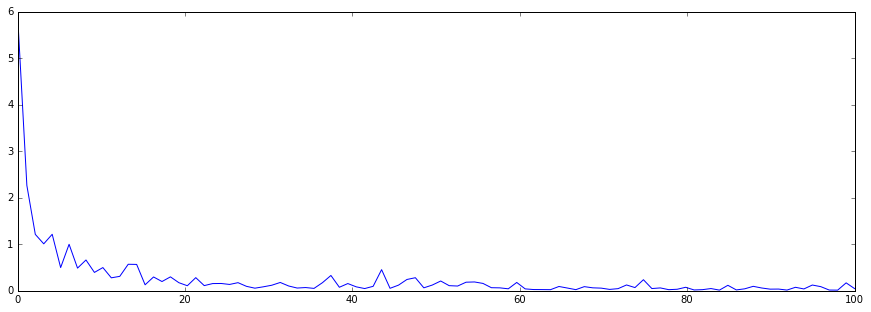

In [8]:
consts = np.linspace(0.1, 100, 100)
log_errs = np.zeros(len(consts))
for i in range(len(log_errs)):
    log_errs[i] = LogError(data, 0.9, consts[i])

figure(figsize=(15,5))
plot(consts, log_errs)
show()